In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import necessary modules
import random

# Define the Player class
class Player:
    def __init__(self, name, money):
        self.name = name
        self.position = 0
        self.money = money
        self.rolle_history = []
        self.money_history = [self.money]
        self.status = 'alive'

    def roll_dice(self):
        # Simulate rolling two dice
        dice1 = random.randint(1, 6)
        dice2 = 0 #random.randint(1, 6) # just one dice for now
        return dice1 + dice2

    def move(self, steps):
        # code to increase money if pass through go
        if self.position + steps >= 28:
            self.money += 30#200 # change to a variable for the go money
        
        # Move the player's position
        self.position = (self.position + steps) % 28
        self.rolle_history.append(steps)


# class to define atributes for the fields of the board
class Field:
    def __init__(self, name, buy_price, rent, sell_price, kind) :
        self.name = name
        self.owner = None
        self.buy_price = buy_price
        self.self_price = sell_price # always 0 for properties
        self.rent = rent
        self.kind = kind # kind can be 'property', 'utility', 'go', 'jail', 'chance', 'auction'

# function that creates a list of 40 fields
def create_fields():
    fields = []
    fields.append(Field('Go', 0, 0, 0, 'go'))

    fields.append(Field('rio', 100, 10, 80, 'property'))
    fields.append(Field('delhi', 100, 10, 80, 'property'))
    fields.append(Field('bangkok', 130, 15, 105, 'property'))
    fields.append(Field('harbor', 100, 35, 80, 'utility'))
    fields.append(Field('cairo', 130, 15, 105, 'property'))
    fields.append(Field('madrid', 130, 15, 105, 'property'))

    fields.append(Field('Chance', 0, 0, 0, 'chance'))
    
    fields.append(Field('jakarta', 170, 20, 135, 'property'))
    fields.append(Field('berlin', 170, 20, 135, 'property'))
    fields.append(Field('moscow', 200, 35, 160, 'property'))
    fields.append(Field('railway', 150, 35, 120, 'utility'))
    fields.append(Field('toronto', 200, 30, 160, 'property'))
    fields.append(Field('seul', 200, 30, 160, 'property'))
    
    fields.append(Field('Jail', 0, 0, 0, 'jail'))

    fields.append(Field('zurich', 250, 35, 200, 'property'))
    fields.append(Field('riyadh', 250, 35, 200, 'property'))
    fields.append(Field('dydney', 300, 40, 240, 'property'))
    fields.append(Field('electricity', 200, 35, 160, 'utility'))
    fields.append(Field('beijing', 300, 40, 240, 'property'))
    fields.append(Field('dubai', 300, 40, 240, 'property'))

    fields.append(Field('Jail', 0, 0, 0, 'auction'))

    fields.append(Field('paris', 350, 45, 280, 'property'))
    fields.append(Field('hong kong', 350, 45, 280, 'property'))
    fields.append(Field('london', 420, 70, 335, 'property'))
    fields.append(Field('airport', 250, 35, 200, 'utility'))
    fields.append(Field('tokyo', 420, 70, 335, 'property'))
    fields.append(Field('new york', 420, 70, 335, 'property'))

    return fields

# function to perform actions based on the landed property
def perform_actions(player, field):
    if field.kind == 'property' or field.kind == 'utility':
        if field.owner == None:
            if player.money >= field.buy_price:
                print(f"{player.name} bought {field.name}")
                field.owner = player
                player.money -= field.buy_price
        else:
            print(f"{player.name} paid rent to {field.owner.name}")
            player.money -= field.rent
            field.owner.money += field.rent
    else:
        pass

    player.money_history.append(player.money)
    
# Define the MonopolyGame class
class MonopolyGame:
    def __init__(self, players):
        self.players = players
        self.board = create_fields()

    def play_game(self):
        # Simulate the game
        theres_a_winner = False
        alive_players = len(self.players)
        while not theres_a_winner:
            for player in self.players:
                if player.status == 'bankrupt':
                    continue
                
                steps = player.roll_dice()
                player.move(steps)
                print(f"{player.name} got {steps}, is now on {self.board[player.position].name}, position {player.position}")

                # Perform actions based on the landed property
                perform_actions(player, self.board[player.position])
                print(f"{player.name} has {player.money} money")

                # code to kill player if bankrupt
                if player.money < -300:
                    print(f"{player.name} has gone bankrupt!")
                    player.status = 'bankrupt'
                    alive_players -= 1
                    # self.players.remove(player)
                    

                # Check if there's a winner
                if alive_players == 1:
                    print(f"there is a winner!")
                    theres_a_winner = True
                    break

                if player.money > 3000:
                    print(f"{player.name} is the winner!")
                    theres_a_winner = True
                    break


# Create players
player1 = Player('Esteban', 500)
player2 = Player('Lucy', 1000)
player3 = Player('Midnight', 1500)

# Create the Monopoly game
game = MonopolyGame([player1, player2, player3])



In [3]:
# simulate the whole game
game.play_game()

Esteban got 4, is now on harbor, position 4
Esteban bought harbor
Esteban has 400 money
Lucy got 4, is now on harbor, position 4
Lucy paid rent to Esteban
Lucy has 965 money
Midnight got 2, is now on delhi, position 2
Midnight bought delhi
Midnight has 1400 money
Esteban got 6, is now on moscow, position 10
Esteban bought moscow
Esteban has 235 money
Lucy got 6, is now on moscow, position 10
Lucy paid rent to Esteban
Lucy has 930 money
Midnight got 3, is now on cairo, position 5
Midnight bought cairo
Midnight has 1270 money
Esteban got 1, is now on railway, position 11
Esteban bought railway
Esteban has 120 money
Lucy got 6, is now on riyadh, position 16
Lucy bought riyadh
Lucy has 680 money
Midnight got 2, is now on Chance, position 7
Midnight has 1270 money
Esteban got 4, is now on zurich, position 15
Esteban has 120 money
Lucy got 6, is now on paris, position 22
Lucy bought paris
Lucy has 330 money
Midnight got 2, is now on berlin, position 9
Midnight bought berlin
Midnight has 1100

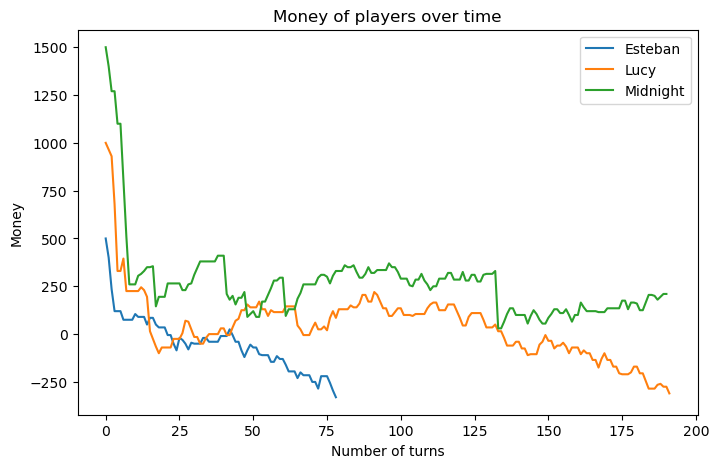

In [4]:
money_histories = []
for player in game.players:
    money_histories.append(player.money_history)

plt.figure(figsize=(8, 5))
for money_history in money_histories:
    plt.plot(money_history)
plt.legend([player.name for player in game.players])
plt.xlabel('Number of turns')
plt.ylabel('Money')
plt.title('Money of players over time')
plt.show()

Esteban got 6, is now on madrid, position 6
Esteban bought madrid
Esteban has 370 money
Lucy got 2, is now on delhi, position 2
Lucy bought delhi
Lucy has 900 money
Midnight got 1, is now on rio, position 1
Midnight bought rio
Midnight has 1400 money
Esteban got 5, is now on railway, position 11
Esteban bought railway
Esteban has 220 money
Lucy got 2, is now on harbor, position 4
Lucy bought harbor
Lucy has 800 money
Midnight got 1, is now on delhi, position 2
Midnight paid rent to Lucy
Midnight has 1390 money
Esteban got 1, is now on toronto, position 12
Esteban bought toronto
Esteban has 20 money
Lucy got 2, is now on madrid, position 6
Lucy paid rent to Esteban
Lucy has 795 money
Midnight got 3, is now on cairo, position 5
Midnight bought cairo
Midnight has 1260 money
Esteban got 6, is now on electricity, position 18
Esteban has 35 money
Lucy got 2, is now on jakarta, position 8
Lucy bought jakarta
Lucy has 625 money
Midnight got 1, is now on madrid, position 6
Midnight paid rent to

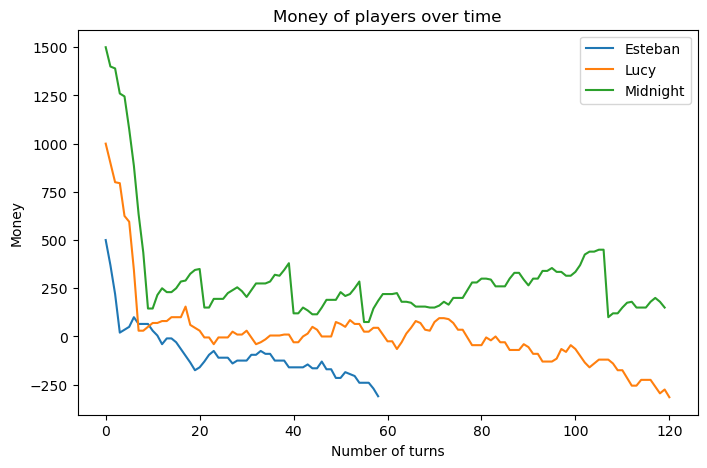

In [5]:
# Create players
player1 = Player('Esteban', 500)
player2 = Player('Lucy', 1000)
player3 = Player('Midnight', 1500)

# Create the Monopoly game
game = MonopolyGame([player1, player2, player3])
# simulate the whole game
game.play_game()
money_histories = []
for player in game.players:
    money_histories.append(player.money_history)

plt.figure(figsize=(8, 5))
for money_history in money_histories:
    plt.plot(money_history)
plt.legend([player.name for player in game.players])
plt.xlabel('Number of turns')
plt.ylabel('Money')
plt.title('Money of players over time')
plt.show()